# Timeseries - AERONET measurements

In [ ]:
# By line: RRB 2020-07-31
# Script aims to:
# - Load multiple easurement files via load function
# - Calculate month averages from high time resolution
# - Extract AOD
# - Plot timeseries from a plot function

### Load python packages

In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import datetime

### Create reusable functions

In [6]:
# Load measurement file and perform monthly averages (files need to all have same structure)
def load_aeronet(filename,header_num):
    data = pd.read_csv(filename,header=header_num,low_memory=False,na_values=-999.)
    meas_date = pd.to_datetime(data['Date(dd:mm:yyyy)'],format='%d:%m:%Y')
    meas_date.name = 'date'
    meas_var = data['AOD_500nm']
    meas_var.index = meas_date
    meas_var_month = meas_var.resample('M',loffset=pd.Timedelta(-15, 'd')).mean()
    return meas_var_month

In [3]:
# Re-usable plotting call
def ts_plot(time_arr,val_arr,color_choice,label_string):
    plt.plot(time_arr, val_arr, '-ok', label=label_string,
         color=color_choice,
         markersize=8, linewidth=3,
         markerfacecolor=color_choice,
         markeredgecolor='grey',
         markeredgewidth=1)

### Load measurements and create month averages

In [4]:
# downloaded from https://aeronet.gsfc.nasa.gov/new_web/data.html
boulder_aod = load_aeronet('AERONET/20010101_20161231_BSRN_BAO_Boulder.lev20',6)
tblmnt_aod = load_aeronet('AERONET/20080101_20191231_Table_Mountain.lev20',6)
cvalla_aod = load_aeronet('AERONET/20120101_20201231_NEON_CVALLA.lev20',6)
cper_aod = load_aeronet('AERONET/20130101_20201231_NEON-CPER.lev20',6)
ster_aod = load_aeronet('AERONET/20130101_20201231_NEON_Sterling.lev20',6)
rmnp_aod = load_aeronet('AERONET/20140101_20201231_NEON_RMNP.lev20',6)

### Plot the value versus time.

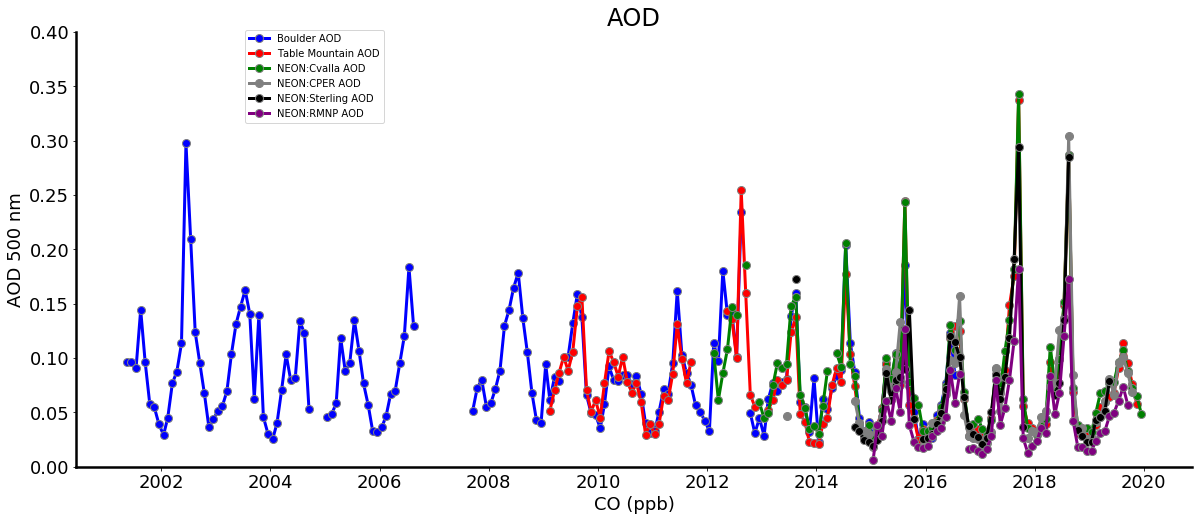

In [7]:
plt.figure(figsize=(20,8))
ax = plt.axes()


ts_plot(boulder_aod.index,boulder_aod,'blue','Boulder AOD')
ts_plot(tblmnt_aod.index,tblmnt_aod,'red','Table Mountain AOD')
ts_plot(cvalla_aod.index,cvalla_aod,'green','NEON:Cvalla AOD')
ts_plot(cper_aod.index,cper_aod,'grey','NEON:CPER AOD')
ts_plot(ster_aod.index,ster_aod,'black','NEON:Sterling AOD')
ts_plot(rmnp_aod.index,rmnp_aod,'purple','NEON:RMNP AOD')

# axes format
plt.xticks(fontsize=18)
ax.set_ylim(0, 0.4)
plt.yticks(np.arange(0, 0.45, step=0.05), fontsize=18)

# adjust border
ax.spines["left"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#titles
plt.title('AOD',fontsize=24)        
plt.xlabel('CO (ppb)',fontsize=18)
plt.ylabel('AOD 500 nm',fontsize=18)

# legend
plt.legend(bbox_to_anchor=(0.28, 0.78),loc='lower right')

plt.show() 